# Phishing SMS Classification Model using Logistic Regression

The following notebook presents the implementation of a Machine Learning model using Logistic Regression for the classification of texts that present phishing features. 
Throughout the notebook, an exploratory analysis of the data for the identification of interesting patterns will be performed, and subsequently, the implementation of the Machine Learning model will be carried out. 

## Importing required Libraries 📚

In [37]:
!pip install unidecode # it is necessary to install this module for data preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import pandas as pd # for data manipulation
import numpy as np # for exploratory analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from unidecode import unidecode # for text preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
# The following libraries are required for the implementation of the machine learning model
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
# display plots generated by matplotlib directly in the notebook
%matplotlib inline 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset load 📅

### About the dataset
The dataset is a set of labelled text messages that have been collected for SMS Phishing research. It has 5971 text messages labeled as Legitimate (Ham) or Spam or Smishing. It includes 489 spam messages, 638 smishing messages, and 4844 ham messages. This dataset contains raw message content that can be used as labelled data in Deep Learning or for extracting further attributes. The dataset contains extracted attributes from malicious messages that can be used for Classification of messages as malicious or legitimate. This dataset also includes python code that are used for extracting attributes.

Referring to: sandhya mishra,
Devpriya Soni
[Click here to access the dataset](https://data.mendeley.com/datasets/f45bkkt8pr/1)

In [39]:
# This allows us to read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Emmazch22/Phishing_Detection/main/data/Dataset_5971.csv', encoding='utf-8')

# observe the first ten records
df.head(10)

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No
5,Smishing,BankOfAmerica Alert 137943. Please follow http...,yes,No,yes
6,ham,Sorry dude. Dont know how i forgot. Even after...,No,No,No
7,ham,I don't quite know what to do. I still can't g...,No,No,No
8,ham,Ok lor. Anyway i thk we cant get tickets now c...,No,No,No
9,ham,Wat r u doing now?,No,No,No


## Data preprocessing 🧹

With the objective of obtaining higher quality data, removing inconsistencies and errors. We proceed to preprocess the data, so that it is easier for the machine learning model to analyze the data.

In [40]:
def remove_stopwords(text):
    # Tokenize the text
    tokens = text.split()

    # Remove the stopwords
    words = [word for word in tokens if word.lower() not in stopwords.words('english')]

    # Join the words back into a string
    clean_text = ' '.join(words)

    return clean_text

In [41]:
# First of all we are going to clean the data
def clean_text(text):
    temp = text.lower()
    temp = unidecode(temp)
    temp = re.sub("'", "", temp)
    temp = re.sub("@[A-Za-z0-9_ÑÁÉÍÓÚ]+","", temp)
    temp = re.sub("#","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-zA-Z0-9ñáéíóú]"," ", temp)
    temp = re.sub('\s+', ' ', temp).strip() # to remove more than one blank in the text
    return temp

In [42]:
# Clean the text
df['TEXT'] = df['TEXT'].map(lambda x : clean_text(x))

In [43]:
# checkout the data
df.head(10)

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,your opinion about me 1 over 2 jada 3 kusruthi...,No,No,No
1,ham,whats up do you want me to come online if you ...,No,No,No
2,ham,so u workin overtime nigpun,No,No,No
3,ham,also sir i sent you an email about how to log ...,No,No,No
4,Smishing,please stay at home to encourage the notion of...,No,No,No
5,Smishing,bankofamerica alert 137943 please follow re ac...,yes,No,yes
6,ham,sorry dude dont know how i forgot even after d...,No,No,No
7,ham,i dont quite know what to do i still cant get ...,No,No,No
8,ham,ok lor anyway i thk we cant get tickets now co...,No,No,No
9,ham,wat r u doing now,No,No,No


In [52]:
# let's check the dimensions of the dataset
df.shape

(5971, 5)

In [44]:
# First we are going to remove the stop_words
df['TEXT'] = df['TEXT'].map(lambda x : remove_stopwords(x))

In [45]:
# checkout the data
df.head(10)

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,opinion 1 2 jada 3 kusruthi 4 lovable 5 silent...,No,No,No
1,ham,whats want come online free talk sometime,No,No,No
2,ham,u workin overtime nigpun,No,No,No
3,ham,also sir sent email log usc payment portal sen...,No,No,No
4,Smishing,please stay home encourage notion staying home...,No,No,No
5,Smishing,bankofamerica alert 137943 please follow activate,yes,No,yes
6,ham,sorry dude dont know forgot even dan reminded ...,No,No,No
7,ham,dont quite know still cant get hold anyone cud...,No,No,No
8,ham,ok lor anyway thk cant get tickets cos like qu...,No,No,No
9,ham,wat r u,No,No,No


In [46]:
# let's check if there are null values in the dataset
print(df.isnull().sum())
# let's check it there are NaN values in the dataset
print(df.isna().sum())

LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64
LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64


Since the dataset has no null values and NaN, there is no need to process it.

In [47]:
# Let's check the number of observations per Label
# first let's review the possible labels
unique_values = df['LABEL'].unique()

print(unique_values)

['ham' 'Smishing' 'spam' 'Spam' 'smishing']


Note that there are more than one representation for a single class, whose difference lies in the presence of capitalization or not. Therefore, we proceed to normalize the label column.

In [48]:
# Apply the normalization
df['LABEL'] = df['LABEL'].str.lower()

# Verification
unique_values = df['LABEL'].unique()

print(unique_values)

['ham' 'smishing' 'spam']


## Exploratory Analysis 📊

In order to find interesting patterns in the data set, an exploratory analysis is performed. Visualization and statistical methods will be applied to observe patterns.

### Frequency Histogram
Let's use a frequency histogram to visualize the distribution of possible LABEL values.

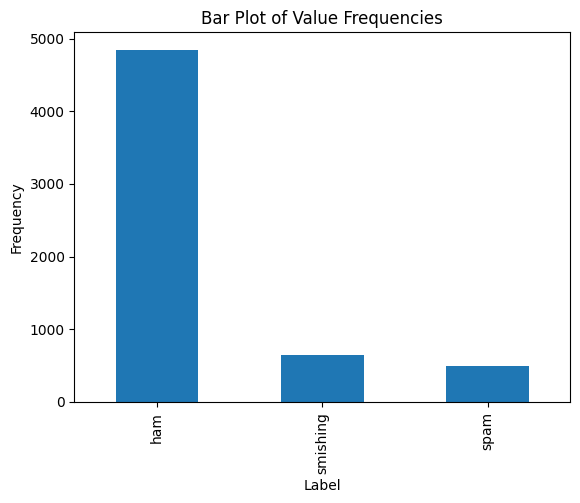

In [51]:

# Count the frequencies of each category
label_counts = df['LABEL'].value_counts()

# Create a bar plot of the frequencies
plot = label_counts.plot(kind='bar')

# Add title and labels
plt.title('Bar Plot of Value Frequencies')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Note that the amount of data classified as 'ham' considerably exceeds the other categories. Ideally, a rebalancing of the data should be implemented to avoid bias when fitting the model. However, we choose to apply a balanced logistic regression, which allows us to handle unbalanced data.

Now let's implement a graph to observe the length of the texts.

<ipython-input-56-fbeddee1d7c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lens)


42.0


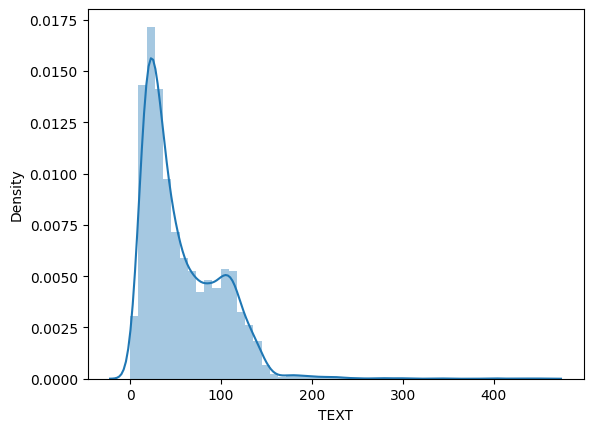

In [56]:
# finding length of tweets
lens = df['TEXT'].str.len()
sns.distplot(lens)


In this case it is possible to observe how the length of the texts follows a bimodal distribution. This indicates that the distribution of the data has two different groups of observations that cluster around different central values.

In [57]:
# To display the median
print(np.median(df['TEXT'].str.len()))

42.0


We will implement wordclouds to visualize patterns of words used in existing categories.

In [63]:
# Let's import some useful libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

(-0.5, 999.5, 799.5, -0.5)

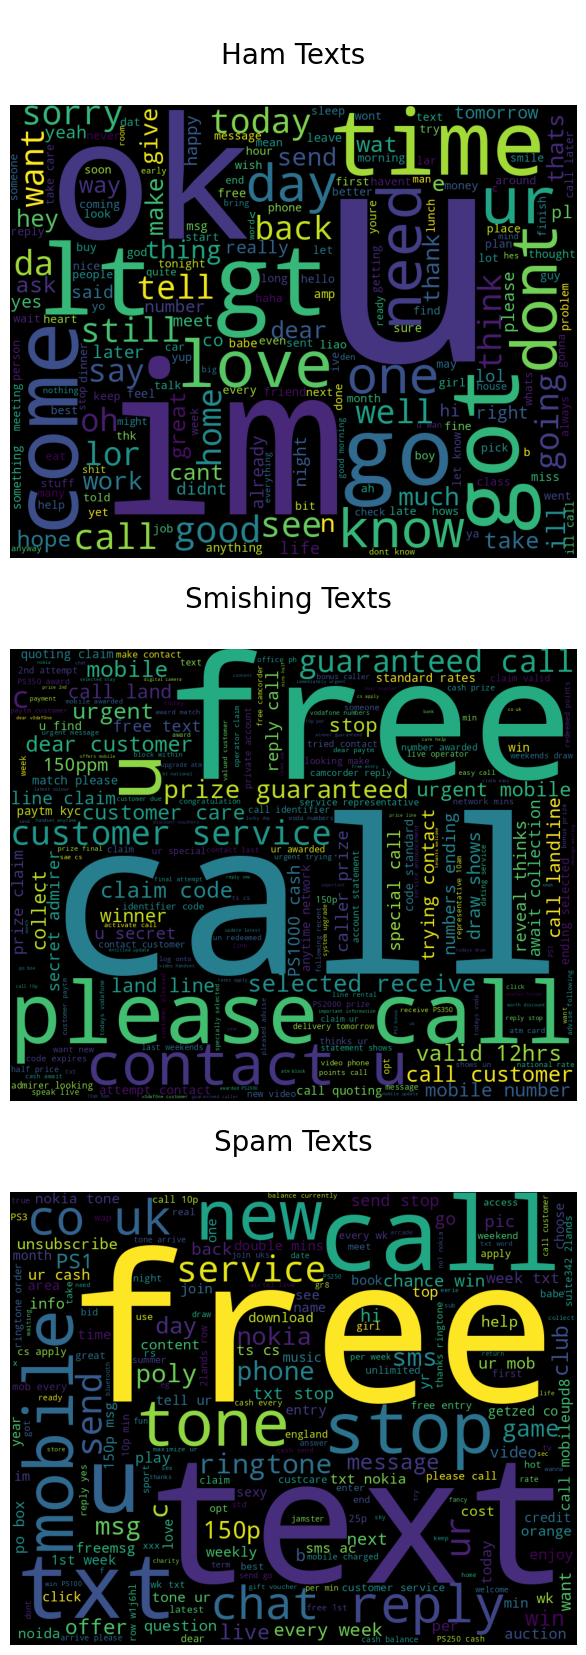

In [64]:
fig, ax = plt.subplots(3, 1, figsize  = (20,20))
cloud_ham=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(df[df['LABEL']=='ham']['TEXT']))
cloud_smishing=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(df[df['LABEL']=='smishing']['TEXT']))
cloud_spam=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(df[df['LABEL']=='spam']['TEXT']))

ax[0].imshow(cloud_ham)
ax[0].set_title('\nHam Texts\n', fontsize=20)
ax[0].axis('off')
print('\n')
ax[1].imshow(cloud_smishing)
ax[1].set_title('\nSmishing Texts \n',fontsize=20)
ax[1].axis('off')
print('\n')
ax[2].imshow(cloud_spam)
ax[2].set_title('\nSpam Texts\n',fontsize=20)
ax[2].axis('off')

Once the exploratory analysis has been performed, the machine learning model is prepared, following the steps of training and test set creation, model tuning, verification, etc.

## Creation of Train and Test sets 📅

In [66]:
# First, let's shuffle the dataset to ensure that there is data from each category in the sets.
df = df.sample(frac= 1, random_state=0)
x = df["TEXT"]
y = df["LABEL"]

size = len(x)

# An 80:20 ratio is used for data distribution, 80% is used for training and 20% for testing.
xTrain = x.head(int(size * 0.8))
xTest =  x.tail(int(size * 0.2))
yTrain = y.head(int(size* 0.8))
yTest =  y.tail(int(size * 0.2))

xTrain

## Model Creation and Adjustment 🤖

In [67]:
max_iters = 4000
c = 1
features = 50000

# Creation of the weighted logistic regression model
model = Pipeline((("vect", TfidfVectorizer(ngram_range=(1,2), max_features=features)),
                  ("clc", LogisticRegression(class_weight='balanced',max_iter=max_iters, C=c))))
model.fit(xTrain,yTrain)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=50000, ngram_range=(1, 2))),
                ('clc',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=4000))])

In [68]:
Pipeline(steps=[(("vect", TfidfVectorizer(ngram_range=(1,2), max_features=features)),
                  ("clc", LogisticRegression(class_weight ='balanced',max_iter=max_iters, C=c)))])

Pipeline(steps=[(('vect',
                  TfidfVectorizer(max_features=50000, ngram_range=(1, 2))),
                 ('clc',
                  LogisticRegression(C=1, class_weight='balanced',
                                     max_iter=4000)))])

In [70]:
# Let's look at the classification report
from sklearn.metrics import classification_report
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       948
    smishing       0.88      0.85      0.86       146
        spam       0.76      0.82      0.79       100

    accuracy                           0.95      1194
   macro avg       0.87      0.88      0.88      1194
weighted avg       0.95      0.95      0.95      1194



Let's evaluate the accuracy of the classification model, in order to determine if its use is appropriate for this particular application.

<Axes: >

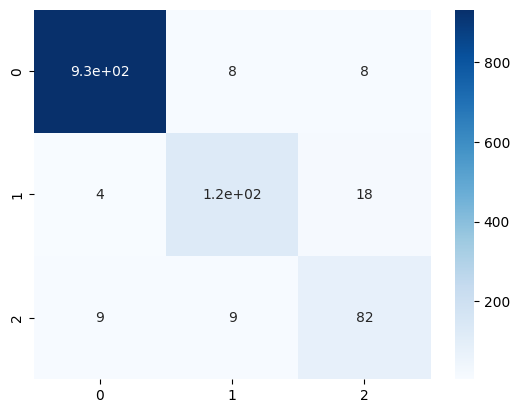

In [75]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(yTest, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues')
# 0: ham, 1: smishing, and 2: spam

## Conclusion 💡
In summary, the logistic regression model has been used in classifying phishing texts according to their category because it is a useful statistical method for predicting the probability of a binary response, in this case, whether or not a message is phishing. In addition, the logistic regression model can also be adapted to classify texts into multiple categories, which makes it suitable for classifying texts into ham, smishing, and spam categories. Through exploratory analysis of the data, the most distinctive words in each category can be identified and used to train and evaluate the logistic regression model. In summary, the logistic regression model is a useful and effective tool for classifying phishing texts according to their category.

Performed by: Emmanuel Zúñiga

## References
mishra, sandhya; Soni, Devpriya (2022), “SMS PHISHING DATASET FOR MACHINE LEARNING AND PATTERN RECOGNITION”, Mendeley Data, V1, doi: 10.17632/f45bkkt8pr.1